In [44]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import requests
from bs4 import BeautifulSoup


stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 

stock_code = stock_code[['회사명', '종목코드']]

stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
stock_code.code = stock_code.code.map('{:06d}'.format)

company='삼성전자' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
count = 0
df = pd.DataFrame()
for page in range(1,100):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    #print(url)
    header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'} 
    res = requests.get(url,headers=header)
    #print(res.status_code)
    


    #if res.status_code != 200 : break
    
    
    dft = pd.read_html(res.text, header=0)[0]
    dft = dft.dropna() 
   
    
    print(dft.head())
    
    #df = pd.merge(df,dft, how = 'outer', on = '날짜')
    df = pd.concat([dft,df], ignore_index = True)
    #print(df.head())
    #df = df.append(pd.read_html(url, header=0)[0], ignore_index=True)

print(df)

#df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 
df = df.drop(df.columns[2],axis =1)
# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'open', 'high', 'low', 'volume']] = df[['close',  'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

df = df.sort_values(by=['date'], ascending=False) 
import matplotlib.pyplot as plt
# 필요한 모듈 import 하기 
import plotly
import plotly.graph_objects as go
import plotly.express as px
# %matplotlib inline 은 jupyter notebook 사용자용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline 

           날짜       종가        전일비       시가       고가       저가         거래량
1  2024.05.31  73500.0        보합0  74500.0  74700.0  73500.0  23551622.0
2  2024.05.30  73500.0  하락  1,700  74800.0  75200.0  73500.0  28551273.0
3  2024.05.29  75200.0  하락  2,400  77700.0  78200.0  75200.0  30244875.0
4  2024.05.28  77600.0    상승  400  76500.0  78000.0  76200.0  18539072.0
5  2024.05.27  77200.0  상승  1,300  75300.0  78200.0  74000.0  43825202.0
           날짜       종가      전일비       시가       고가       저가         거래량
1  2024.05.17  77400.0  하락  800  78600.0  78800.0  77200.0  15918201.0
2  2024.05.16  78200.0  하락  100  80200.0  80300.0  78100.0  20989778.0
3  2024.05.14  78300.0  하락  100  78600.0  78800.0  77900.0  11763992.0
4  2024.05.13  78400.0  하락  800  79400.0  79900.0  77600.0  18652344.0
5  2024.05.10  79200.0  하락  500  80400.0  81100.0  78900.0  16976124.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2024.04.30  77500.0    상승  800  77000.0  78500.0  76600.0  1

           날짜       종가        전일비       시가       고가       저가         거래량
1  2023.08.03  68800.0  하락  1,100  69900.0  70200.0  68500.0  20087090.0
2  2023.08.02  69900.0  하락  1,200  70700.0  71000.0  69800.0  13835020.0
3  2023.08.01  71100.0  상승  1,300  70100.0  71200.0  70000.0  12299254.0
4  2023.07.31  69800.0    하락  800  70900.0  71000.0  69800.0  13035420.0
5  2023.07.28  70600.0  하락  1,100  71800.0  72400.0  70100.0  19420683.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2023.07.20  71000.0    하락  700  71100.0  71500.0  70800.0   9732730.0
2  2023.07.19  71700.0    하락  300  72700.0  72800.0  71300.0  10896412.0
3  2023.07.18  72000.0  하락  1,300  73200.0  73500.0  72000.0  11697900.0
4  2023.07.17  73300.0    하락  100  73200.0  73500.0  72800.0  10060049.0
5  2023.07.14  73400.0  상승  1,500  72500.0  73400.0  72400.0  15882519.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2023.07.06  71600.0    하락  400  71900.0  72400.0

           날짜       종가        전일비       시가       고가       저가         거래량
1  2022.10.17  56600.0    상승  300  55800.0  57000.0  55700.0  13641878.0
2  2022.10.14  56300.0  상승  1,100  56200.0  56500.0  55800.0  12924326.0
3  2022.10.13  55200.0    하락  600  55400.0  56100.0  55200.0  13784602.0
4  2022.10.12  55800.0    상승  400  55700.0  57000.0  55200.0  18408910.0
5  2022.10.11  55400.0    하락  800  54400.0  55700.0  54000.0  21437877.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2022.09.29  52600.0    하락  300  53300.0  53700.0  52600.0  13882080.0
2  2022.09.28  52900.0  하락  1,300  53900.0  54400.0  52500.0  19991129.0
3  2022.09.27  54200.0    상승  300  53800.0  54200.0  53500.0  16631289.0
4  2022.09.26  53900.0    하락  600  53700.0  54200.0  53600.0  15008449.0
5  2022.09.23  54500.0    상승  100  54400.0  54900.0  54200.0  10555964.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2022.09.15  56000.0    하락  800  57000.0  57100.0

           날짜       종가        전일비       시가       고가       저가         거래량
1  2022.01.05  77400.0  하락  1,300  78800.0  79000.0  76400.0  25470640.0
2  2022.01.04  78700.0    상승  100  78800.0  79200.0  78300.0  12427416.0
3  2022.01.03  78600.0    상승  300  79400.0  79800.0  78200.0  13502112.0
4  2021.12.30  78300.0    하락  500  78900.0  79500.0  78100.0  14236700.0
5  2021.12.29  78800.0  하락  1,500  80200.0  80200.0  78500.0  19794795.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.12.21  78100.0  상승  1,000  77900.0  78300.0  77500.0  14245298.0
2  2021.12.20  77100.0    하락  900  77600.0  77800.0  76800.0  11264375.0
3  2021.12.17  78000.0    상승  200  76800.0  78000.0  76800.0  13108479.0
4  2021.12.16  77800.0    상승  200  78500.0  78500.0  77400.0  11996128.0
5  2021.12.15  77600.0    상승  600  76400.0  77600.0  76300.0   9584939.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.12.07  77400.0  상승  1,100  76100.0  77700.0

           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.03.18  82900.0    상승  600  82800.0  83800.0  82600.0  18585244.0
2  2021.03.17  82300.0    하락  500  82800.0  82900.0  82000.0  11625146.0
3  2021.03.16  82800.0  상승  1,000  82200.0  83000.0  82100.0  12293537.0
4  2021.03.15  81800.0  하락  1,000  82800.0  82900.0  81800.0  13735798.0
5  2021.03.12  82800.0    상승  800  83100.0  83500.0  82400.0  13530573.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.03.04  82400.0  하락  1,600  82600.0  83200.0  82200.0  24348331.0
2  2021.03.03  84000.0    상승  400  83500.0  84000.0  82800.0  19882132.0
3  2021.03.02  83600.0  상승  1,100  85100.0  85300.0  83000.0  33498180.0
4  2021.02.26  82500.0  하락  2,800  82800.0  83400.0  82000.0  38520800.0
5  2021.02.25  85300.0  상승  3,300  84000.0  85400.0  83000.0  34155986.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.02.17  83200.0  하락  1,700  83900.0  84200.0

In [45]:
df.set_index('date',inplace = True)

In [46]:
df['close'] = df['close'].astype(float)

In [47]:
df.head()

,close,open,high,low,volume
date,,,,,
2024-05-31,73500.0,74500,74700,73500,23551622
2024-05-30,73500.0,74800,75200,73500,28551273
2024-05-29,75200.0,77700,78200,75200,30244875
2024-05-28,77600.0,76500,78000,76200,18539072
2024-05-27,77200.0,75300,78200,74000,43825202


In [48]:
#training and label 
X = df.iloc[:,1:] # open, high, low, volume => x
y = df.iloc[:,0:1] #close ==> label

In [49]:
print(X)
print(y)

             open   high    low    volume
date                                     
2024-05-31  74500  74700  73500  23551622
2024-05-30  74800  75200  73500  28551273
2024-05-29  77700  78200  75200  30244875
2024-05-28  76500  78000  76200  18539072
2024-05-27  75300  78200  74000  43825202
...           ...    ...    ...       ...
2020-06-03  51800  55000  51700  49257814
2020-06-02  51000  51500  50800  14247933
2020-06-01  50800  51200  50600  16949183
2020-05-29  50000  50700  49700  27596961
2020-05-28  51100  51200  49900  31309318

[990 rows x 4 columns]
              close
date               
2024-05-31  73500.0
2024-05-30  73500.0
2024-05-29  75200.0
2024-05-28  77600.0
2024-05-27  77200.0
...             ...
2020-06-03  54500.0
2020-06-02  51400.0
2020-06-01  51200.0
2020-05-29  50700.0
2020-05-28  50400.0

[990 rows x 1 columns]


In [50]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [51]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

# 800 : 190
X_train = X_ss[:800, :] 
X_test = X_ss[800:, :] 

y_train = y_ms[:800, :]
y_test = y_ms[800:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (800, 4) (800, 1)
Testing Shape (190, 4) (190, 1)


In [52]:
#dataset shape size reshpae

X_train_tensors = Variable(torch.Tensor(X_train)) 
X_test_tensors = Variable(torch.Tensor(X_test))


y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

Training Shape torch.Size([800, 1, 4]) torch.Size([800, 1])
Testing Shape torch.Size([190, 1, 4]) torch.Size([190, 1])


In [53]:
#LSTM model 

class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128) 
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [54]:
#hyper param
num_epochs = 10000
learning_rate = 0.0001

input_size = 4
hidden_size = 2
num_layers = 1

num_classes = 1 
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [55]:
#training


import time


hist = np.zeros(num_epochs)
start_time = time.time()

for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    
    hist[epoch] = loss.item()
    loss.backward()
    
    optimizer.step()
    if epoch % 1000 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        
training_time = time.time()-start_time

Epoch: 0, loss: 0.17942
Epoch: 1000, loss: 0.00668
Epoch: 2000, loss: 0.00320
Epoch: 3000, loss: 0.00163
Epoch: 4000, loss: 0.00082
Epoch: 5000, loss: 0.00043
Epoch: 6000, loss: 0.00030
Epoch: 7000, loss: 0.00022
Epoch: 8000, loss: 0.00019
Epoch: 9000, loss: 0.00016


In [13]:
# transform and reshape
df_x_ss = ss.transform(df.iloc[:, 1:]) 
df_y_ms = ms.transform(df.iloc[:, 0:1])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

In [14]:
import seaborn as sns
sns.set_style("darkgrid")    

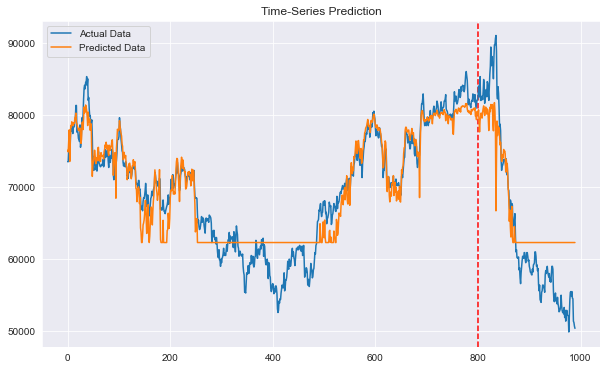

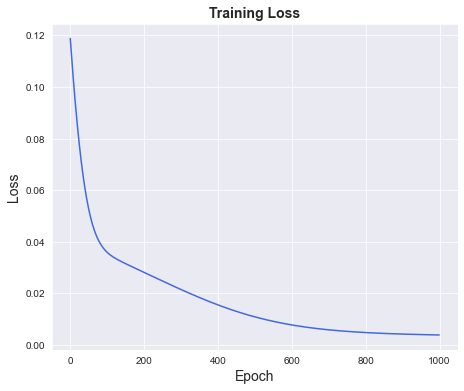

In [15]:
# graph plot


train_predict = model(df_x_ss) #------ 훈련 데이터셋을 모델에 적용하여 모델 학습
predicted = train_predict.data.numpy() #------ 모델 학습 결과를 넘파이로 변경
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) #------ 모델 학습을 위해 전처리(정규화)했던 것을 해제(그래프의 본래 값을 출력하기 위한 목적)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) #------ 그래프로 표시(plotting)
plt.axvline(x=800, c='r', linestyle='--') #------ ①

lstm_predicted = predicted

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [16]:
## metric 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# rmse
def calculate_rmse(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    RMSE = mean_squared_error(real, predict)**0.5
    return round(RMSE, 4)
    return RMSE

# rrmse
def calculate_rrmse(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    Y_h = np.mean(real)
    RRMSE = np.sqrt(np.sum(np.square(predict - real)) / np.sum(np.square(Y_h - real)))
    #return round(RRMSE, 4)
    return RRMSE




# nrmse
def calculate_nrmse(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    NRMSE = np.sqrt(np.mean(np.square(real - predict)))/np.mean(real)
    return round(NRMSE, 4)
    return NRMSE

# mae
def calculate_mae(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    MAE = mean_absolute_error(real,predict)
    return round(MAE,4)
    return MAE 

#rsqr
def calculate_r2(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    R2= r2_score(real,predict)
    return round(R2)
    return R2


In [17]:
import math
'''
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
'''
lstm = []
#rmse

testScore = calculate_rmse(label_y, predicted)
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(testScore)

#rrmse

testScore = calculate_rrmse(label_y, predicted)
print('Test Score: %.2f RRMSE' % (testScore))
lstm.append(testScore)

#nrmse

testScore = calculate_nrmse(label_y, predicted)
print('Test Score: %.2f NRMSE' % (testScore))
lstm.append(testScore)

#mae

testScore = calculate_mae(label_y, predicted)
print('Test Score: %.2f MAE' % (testScore))
lstm.append(testScore)

#r2

testScore = calculate_r2(label_y, predicted)
print('Test Score: %.2f R2' % (testScore))
lstm.append(testScore)

lstm.append(training_time)

Test Score: 3497.05 RMSE
Test Score: 0.39 RRMSE
Test Score: 0.05 NRMSE
Test Score: 2488.93 MAE
Test Score: 1.00 R2


In [56]:
#for Bidirection LSTM

class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_size*2, num_classes) #------ ②
        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])# ------ 마지막 시간(time step상 마지막 단계)의 은닉 상태
        out = self.relu(out)
        return out

In [57]:
#model training

num_epochs = 10000
learning_rate = 0.0001

input_size = 4
hidden_size = 2
num_layers = 1
num_classes = 1
model = biLSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


hist = np.zeros(num_epochs)
start_time = time.time()


for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    
    loss = criterion(outputs, y_train_tensors)
    hist[epoch] = loss.item()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
        
training_time = time.time()-start_time

Epoch: 0, loss: 0.13378
Epoch: 1000, loss: 0.03604
Epoch: 2000, loss: 0.00724
Epoch: 3000, loss: 0.00144
Epoch: 4000, loss: 0.00075
Epoch: 5000, loss: 0.00059
Epoch: 6000, loss: 0.00049
Epoch: 7000, loss: 0.00041
Epoch: 8000, loss: 0.00035
Epoch: 9000, loss: 0.00031


In [58]:
# transform and reshape
df_x_ss = ss.transform(df.iloc[:, 1:]) 
df_y_ms = ms.transform(df.iloc[:, 0:1])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

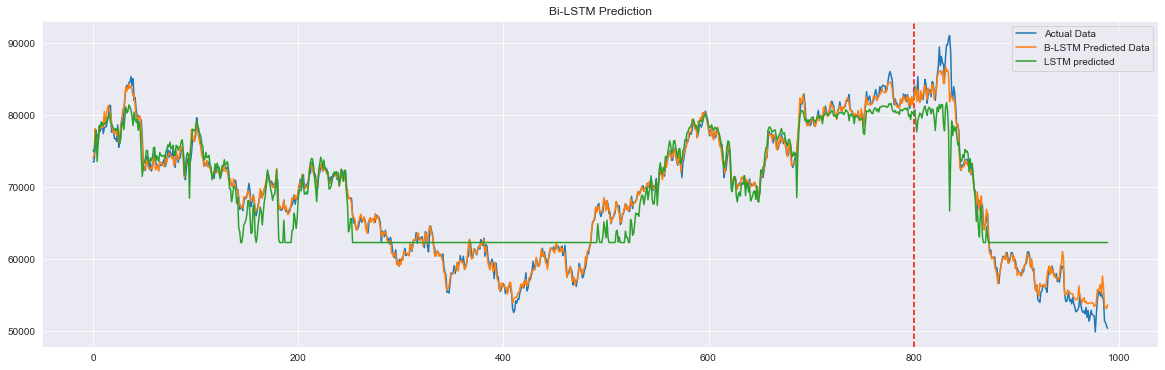

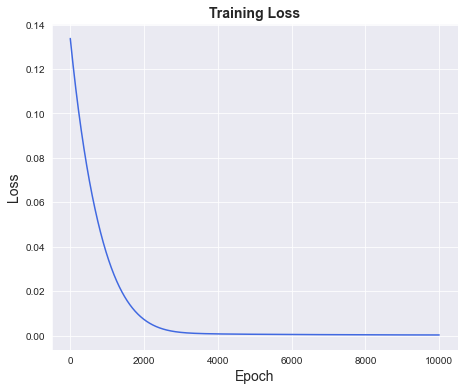

In [59]:
# graph plot


train_predict = model(df_x_ss) #------ 훈련 데이터셋을 모델에 적용하여 모델 학습
predicted = train_predict.data.numpy() #------ 모델 학습 결과를 넘파이로 변경
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) #------ 모델 학습을 위해 전처리(정규화)했던 것을 해제(그래프의 본래 값을 출력하기 위한 목적)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(20,6)) #------ 그래프로 표시(plotting)
plt.axvline(x=800, c='r', linestyle='--') #------ ①

blstm_predicted = predicted

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='B-LSTM Predicted Data')
plt.plot(lstm_predicted, label = 'LSTM predicted')
plt.title('Bi-LSTM Prediction')
plt.legend()
plt.show()

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [60]:
blstm = []
#rmse

testScore = calculate_rmse(label_y, predicted)
print('Test Score: %.4f RMSE' % (testScore))
blstm.append(testScore)

#rrmse

testScore = calculate_rrmse(label_y, predicted)
print('Test Score: %.4f RRMSE' % (testScore))
blstm.append(testScore)

#nrmse

testScore = calculate_nrmse(label_y, predicted)
print('Test Score: %.4f NRMSE' % (testScore))
blstm.append(testScore)

#mae

testScore = calculate_mae(label_y, predicted)
print('Test Score: %.4f MAE' % (testScore))
blstm.append(testScore)

#r2

testScore = calculate_r2(label_y, predicted)
print('Test Score: %.4f R2' % (testScore))
blstm.append(testScore)

blstm.append(training_time)

Test Score: 887.3001 RMSE
Test Score: 0.0983 RRMSE
Test Score: 0.0128 NRMSE
Test Score: 602.8202 MAE
Test Score: 1.0000 R2


In [61]:
lstm = pd.DataFrame(lstm, columns=['LSTM'])
blstm = pd.DataFrame(blstm, columns=['BD-LSTM'])
result = pd.concat([lstm, blstm], axis=1, join='inner')
result.index = [ 'Test RMSE', 'Test RRMSE','Test NRMSE', 'Test MAE','Test R2','Train Time']
result

,LSTM,BD-LSTM
Test RMSE,3497.048900,887.300100
Test RRMSE,0.387385,0.098291
Test NRMSE,0.050500,0.012800
Test MAE,2488.930420,602.820190
Test R2,1.000000,1.000000
Train Time,2.758778,29.001924
